# Problem 12.7

**Fundamentals of Solar Cells and Photovoltaic Systems Engineering**

**Solutions Manual - Chapter 12**

**Problem 12.7**


**Using the QE of a silicon solar cell, calculate the photogenerated current density $J_L$ under the reference spectrum AM1.5G and compare it to the $J_L$ obtained from irradiance spectra produced by a Xe-arc lamp and a quartz tungsten halogen lamp. Then, calculate the error produced using a solar simulator based on Xe-arc or quartz tungsten lamps. The tabulated spectra and QE are provided in the online repository of this book.**

**Note that the error may be large because the Xe-arc and the quartz W halogen lamps are not placed at the right distance from the measuring plane. Let us assume that the spectral irradiance of the two lamps decreases homogeneously by 1% throughout the whole wavelength range for each cm of separation that is added between the lamp and the measuring plane. How far should each lamp be located with respect to the initial position to produce the same $J_L$ that the AM1.5G solar?**

We will use the package [pandas](https://pandas.pydata.org/) to handle the data and [matplotlib.pyplot](https://matplotlib.org/stable/index.html) to plot the results.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

We start by importing the data for the solar spectra.

In [12]:
reference = pd.read_csv('data/Reference_spectrum_ASTM-G173-03.csv', index_col=0, header=0) 
reference

,AM0,AM1.5G,AM1.5D
Wvlgth nm,Etr W*m-2*nm-1,Global tilt W*m-2*nm-1,Direct+circumsolar W*m-2*nm-1
280,8.20E-02,4.73E-23,2.54E-26
280.5,9.90E-02,1.23E-21,1.09E-24
281,1.50E-01,5.69E-21,6.13E-24
281.5,2.12E-01,1.57E-19,2.75E-22
...,...,...,...
3980,8.84E-03,7.39E-03,7.40E-03
3985,8.80E-03,7.43E-03,7.45E-03
3990,8.78E-03,7.37E-03,7.39E-03
3995,8.70E-03,7.21E-03,7.23E-03


In [13]:
reference.drop(reference.index[0], inplace=True)   # remove row including information on units
reference=reference.astype(float)                  # convert values to float for easy operation
reference.index=reference.index.astype(float)      # convert indexes to float for easy operation

We import the data for the Xe-arc lamp.

In [14]:
xe_arc = pd.read_csv('data/Xe lamp spectral irradiance.csv', index_col=0, header=0) 
xe_arc

,Xe arc lamp (W*m-2*nm-1)
wavelength (nm),
300.36966,0.000793
300.58005,0.000816
300.79044,0.000837
301.00082,0.000858
301.21124,0.000876
...,...
1199.77246,0.213920
1199.84302,0.213600
1199.91345,0.213280


We import the data for the quartz tungsten lamp.

In [15]:
quartz_w = pd.read_csv('data/W lamp spectral irradiance.csv', index_col=0, header=0) 
quartz_w

,W halogen lamp (W*m-2*nm-1)
wavelength (nm),
300,0.000001
301,0.000010
302,0.000100
303,0.000200
304,0.000300
...,...
1196,0.654304
1197,0.653941
1198,0.651544


We can also plot the AM1.5G spectra, the Xe-arc lamp, and the quarz tungsten lamp spectra.

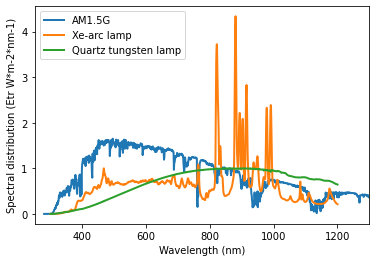

In [16]:
plt.plot(reference['AM1.5G'], 
         linewidth=2, label='AM1.5G')
plt.plot(xe_arc, 
         linewidth=2, label='Xe-arc lamp')
plt.plot(quartz_w, 
         linewidth=2, label='Quartz tungsten lamp')
plt.ylabel('Spectral distribution (Etr W*m-2*nm-1)')
plt.xlabel('Wavelength (nm)')
plt.xlim([250,1300])
plt.legend()

We define the relevant constants and import the QE of the silicon solar cell.

In [17]:
h=6.63*10**(-34)   # [J·s] Planck constant
e=1.60*10**(-19)   # [C] electron charge
c =299792458       #[m/s] Light speed

In [38]:
QE = pd.read_csv('data/QE_Silicon.csv', index_col=0, header=0) 
QE

,QE Silicon Solar cell
nm,
305,0.185579
310,0.243200
315,0.298992
320,0.353041
325,0.405425
...,...
1130,0.081951
1135,0.067769
1140,0.053712


We calculate the Spectral Response (SR) of the silicon solar cell and plot it. 

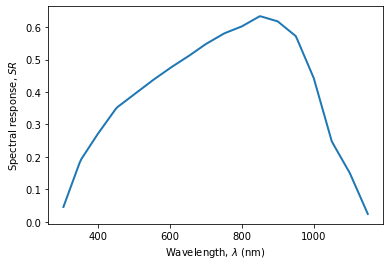

In [19]:
SR=pd.Series(index=QE.index,
            data=[QE.loc[i,'QE Silicon Solar cell']*e*i*0.000000001/(h*c) for i in QE.index])
plt.plot(SR, 
         linewidth=2)
plt.ylabel('Spectral response, $SR$')
plt.xlabel(r'Wavelength, $\lambda$ (nm)');

For the reference AM1.5G, we interpolate the spectrum at those datapoints included in the SR, and integrate to obtain the short-circuit current density using Eq. 3.5.

$J=\int SR(\lambda) \cdot G(\lambda) \ d\lambda$


In [20]:
spectra=reference['AM1.5G']
spectra_interpolated=np.interp(SR.index, spectra.index, spectra.values)

J_reference = np.trapz([x*y for x,y in zip(SR, spectra_interpolated)], x=SR.index)*1000/10000 # A-> mA ; m2 -> cm2
print('Photocurrent density = ' + str(J_reference.round(1)) + ' mA/cm2')


Photocurrent density = 36.7 mA/cm2


We repeat the calculation for the Xe-arc lamp spectra.

In [21]:
spectra=xe_arc['Xe arc lamp (W*m-2*nm-1)']
spectra_interpolated=np.interp(SR.index, spectra.index, spectra.values)

J_xe_arc = np.trapz([x*y for x,y in zip(SR, spectra_interpolated)], x=SR.index)*1000/10000 # A-> mA ; m2 -> cm2
print('Photocurrent density = ' + str(J_xe_arc.round(1)) + ' mA/cm2')

Photocurrent density = 27.1 mA/cm2


We calculate the error when determining the photocurrent density using the Xe-arc lamp.

In [26]:
error_xe_arc=1-J_xe_arc/J_reference
print('Error = ' + str(100*error_xe_arc.round(2)) + ' %')

Error = 26.0 %


Hence, the Xe-arc lamp should be moved 26 cm closer. 

We repeat the calculation for the quartz tungsten lamp spectra.

In [35]:
spectra=quartz_w['W halogen lamp (W*m-2*nm-1)']
spectra_interpolated=np.interp(SR.index, spectra.index, spectra.values)

J_quartz_w = np.trapz([x*y for x,y in zip(SR, spectra_interpolated)], x=SR.index)*1000/10000 # A-> mA ; m2 -> cm2
print('Photocurrent density = ' + str(J_quartz_w.round(1)) + ' mA/cm2')

Photocurrent density = 26.9 mA/cm2


We calculate the error when determining the photocurrent density using the quartz tungsten lamp.

In [36]:
error_quartz_w=1-J_quartz_w/J_reference
print('Error = ' + str(100*error_quartz_w.round(2)) + ' %')

Error = 27.0 %


Hence, the quartz tungsten lamp should be moved 27 cm closer. 